## Write a data science blog post Udacity Project

Given an online booking platform in a travel agency, a client requests to make a booking, and
based on the sales communication, they choose to confirm and pay or not

Description of what each variable means:                          
1) **request_id, client_id**: ids for a given booking request and a given client (used internally in the system).     
2) **confirmed**: the target variable (label), a boolean indicating whether the client has actually confirmed or not.               
3) **nation**: country of origin of client                  
4) **arrival_date, departure_date**: when a client is expecting to arrive at and depart their destination          
5) **num_of_adults, num_of_children**: number of adults and children travelling in the group           
6) **price**: the price paid for this request (in case of confirmation)           
7) **currency_id**: the currency used for payment (in case of confirmation)             
8) **adwords**: a boolean indicating whether this data originated from online advertising         
9) **source_id, sub_source_id**: id of origin of request (travel agency website, direct mail, etc..)

### CRISP-DM

### 1. Business Understanding

1. What are the top nationalities that get confirmed requests or makes requests in general?
2. Does people like to travel in groups or alone and does it affects client confirmation?
3. Does price affects clients confirmation?
4. Does duration of travel affects clients confirmation?
5. How well can we predict a clients confirmation?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import figure
%matplotlib inline
sb.set_style("darkgrid")

In [2]:
df = pd.read_csv('sampled.csv')
df.sample(10)

,request_id,confirmed,client_id,nation,arrival_date,departure_date,num_of_adults,num_of_children,price,currency_id,adwords,source_id,sub_id
948,14048210,0,375379160,United States,2018-08-24,2018-09-02,2.0,NaN,NaN,NaN,0,29.0,0
286,600747042,1,679099458,United States,2017-03-31,2017-04-08,2.0,NaN,80.0,2.0,1,1.0,39
871,876447691,0,429656690,Lebanon,2015-09-25,2015-09-30,1.0,NaN,NaN,NaN,0,1.0,0
764,305074688,0,126549082,United States,2017-04-15,2017-04-15,2.0,1.0,NaN,NaN,0,1.0,0
933,513898316,1,914879649,United Kingdom,2015-09-09,2015-09-15,2.0,NaN,9.0,4.0,1,1.0,39
29,424779327,0,831621314,Germany,2016-01-23,2016-01-30,NaN,NaN,NaN,NaN,0,93.0,17
46,899418575,0,583708263,Australia,2013-09-02,2013-09-16,1.0,NaN,NaN,NaN,0,1.0,0
114,192149647,1,79879795,Germany,2012-11-24,2012-11-24,2.0,NaN,49.0,1.0,0,1.0,16
838,339661291,0,853665252,United States,2017-09-18,2017-09-23,NaN,NaN,NaN,NaN,0,1.0,0
443,818245327,0,705536932,Kenya,2016-12-27,2016-12-27,2.0,NaN,NaN,NaN,0,29.0,0


In [4]:
df.shape

(1000, 13)

### 2. Data Understanding

<Figure size 1800x1080 with 0 Axes>

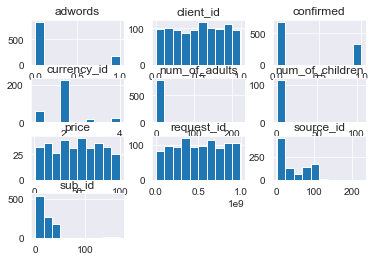

In [114]:
figure(figsize=(25,15))
df.hist();

Which columns had no missing values?

In [13]:
no_nulls = set(df.columns[df.isna().sum() == 0])
no_nulls

{'adwords', 'client_id', 'confirmed', 'nation', 'request_id', 'sub_id'}

Which columns have the most missing values?

In [17]:
most_missing_values = set(df.columns[df.isna().mean() > 0.6])
most_missing_values

{'currency_id', 'num_of_children', 'price'}

##### We can find the ten top nationalities that make requests in general

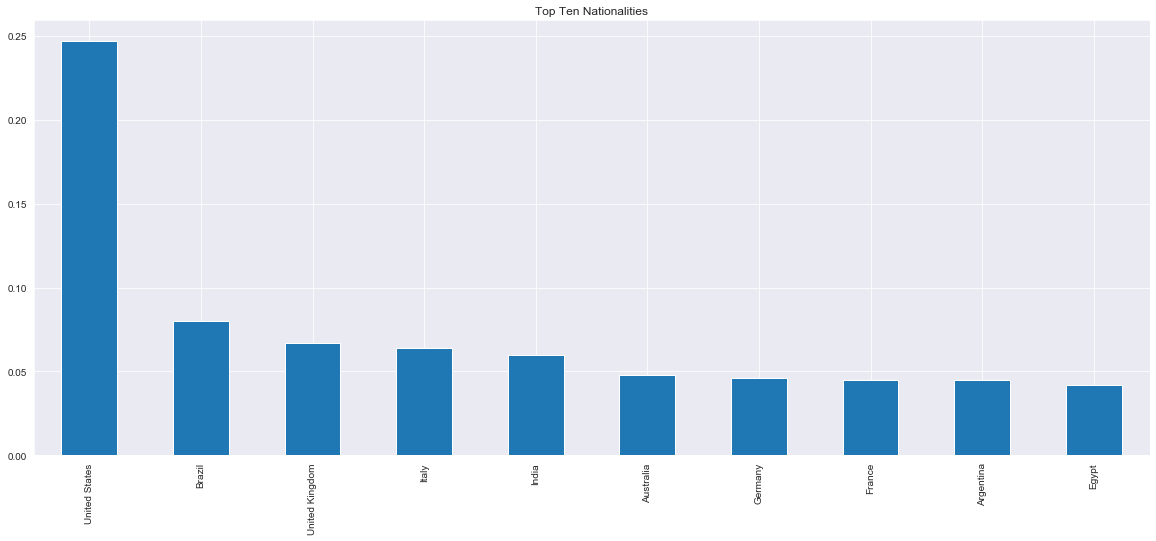

In [5]:
figure(figsize=(20,8))
top_nationalities_values = df.nation.value_counts()[:10]
(top_nationalities_values/df.shape[0]).plot(kind='bar');
plt.title('Top Ten Nationalities');
plt.xticks(rotation=90);

In [6]:
top_nationalities = list(df.nation.value_counts().index[:10])
top_nationalities_df = df[df['nation'].isin(top_nationalities)]

##### We can find from the top ten nations, which nation get the most confirmed cases

Text(0.5, 1.0, 'Top Ten Nationalities Confirmed Cases')

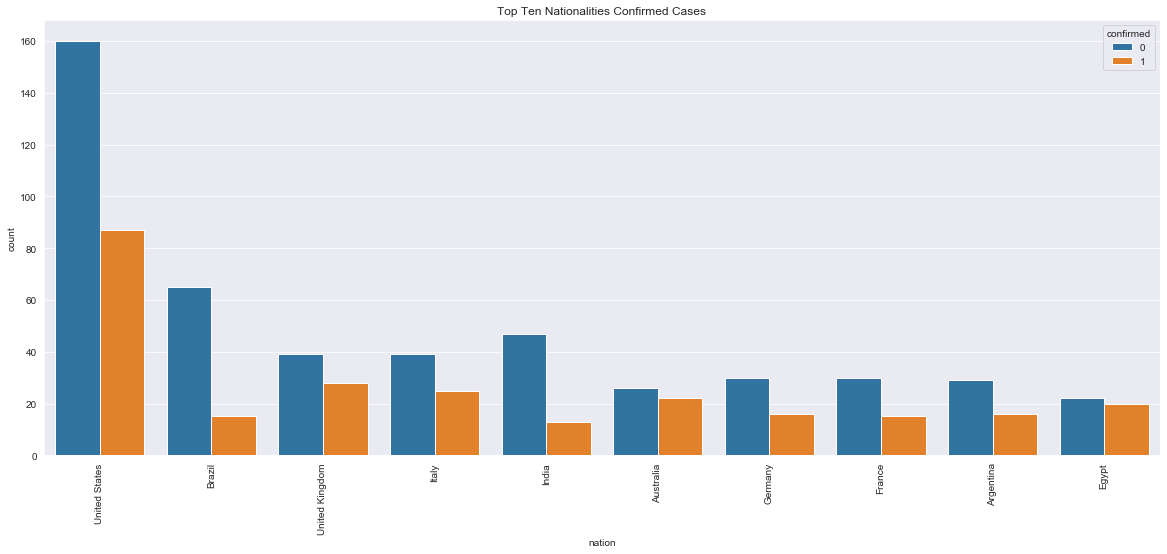

In [25]:
figure(figsize=(20,8))
ax = sb.countplot(data=top_nationalities_df, x=top_nationalities_df.nation, hue='confirmed', order=top_nationalities);
plt.xticks(rotation=90);
plt.title('Top Ten Nationalities Confirmed Cases')

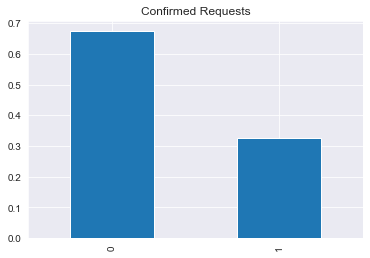

In [11]:
(df.confirmed.value_counts() / df.shape[0]).plot(kind='bar');
plt.title('Confirmed Requests');

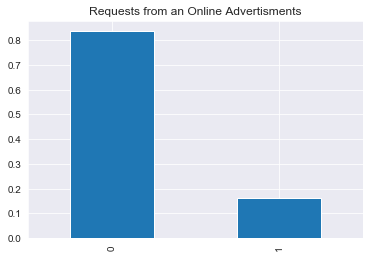

In [13]:
(df.adwords.value_counts() / df.shape[0]).plot(kind='bar');
plt.title('Requests from an Online Advertisments');

### 3. Prepare Data

Change two date columns from `object` to `date` data type

In [14]:
df_cleaned = df.copy()

In [15]:
df_cleaned['arrival_date'] =  pd.to_datetime(df_cleaned['arrival_date'], format='%Y-%m-%d')
df_cleaned['departure_date'] =  pd.to_datetime(df_cleaned['departure_date'], format='%Y-%m-%d')

Impute date missing values with most occuring dates

In [16]:
df_cleaned['arrival_date'].replace([np.nan], [df_cleaned.arrival_date.mode()], inplace=True)
df_cleaned['departure_date'].replace([np.nan], [df_cleaned.departure_date.mode()], inplace=True)

Feature engineer a new column `Duration` that indicates how many days does requester tends to stay

In [17]:
df_cleaned['Duration'] = (df_cleaned['departure_date'] - df_cleaned['arrival_date']).dt.days

In [87]:
df_cleaned.head()

,request_id,confirmed,client_id,nation,arrival_date,departure_date,num_of_adults,num_of_children,price,currency_id,adwords,source_id,sub_id,Duration
0,806181796,0,123420484,Germany,2016-12-26,2017-01-02,2.0,NaN,NaN,NaN,0,99.0,0,7.0
1,38700156,0,839911394,Chile,2012-10-17,2012-10-24,2.0,NaN,NaN,NaN,0,29.0,17,7.0
2,992039421,0,62928855,United Kingdom,2016-05-15,2016-05-18,5.0,NaN,NaN,NaN,0,1.0,0,3.0
3,625114613,0,374952733,Argentina,2018-03-17,2018-03-17,2.0,NaN,NaN,NaN,0,94.0,8,0.0
4,647445179,0,600861297,Chile,2013-01-13,2013-01-13,NaN,NaN,NaN,NaN,0,5.0,0,0.0


In [88]:
df_cleaned.describe()

,request_id,confirmed,client_id,num_of_adults,num_of_children,price,currency_id,adwords,source_id,sub_id,Duration
count,1.000000e+03,1000.000000,1.000000e+03,780.000000,113.000000,329.000000,329.000000,1000.000000,986.000000,1000.000000,974.000000
mean,5.112927e+08,0.325000,5.059396e+08,2.796154,2.433628,49.112462,2.006079,0.164000,42.561866,15.018000,4.207392
std,2.840683e+08,0.468609,2.882389e+08,8.185321,9.857807,27.724518,0.728320,0.370461,44.400790,18.637033,13.916286
min,1.350906e+06,0.000000,3.026870e+05,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-352.000000
25%,2.671576e+08,0.000000,2.515670e+08,2.000000,1.000000,25.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,5.190409e+08,0.000000,5.169784e+08,2.000000,1.000000,50.000000,2.000000,0.000000,29.000000,15.000000,3.000000
75%,7.548263e+08,1.000000,7.588429e+08,2.000000,2.000000,73.000000,2.000000,0.000000,87.000000,17.000000,7.000000
max,9.988137e+08,1.000000,9.982175e+08,222.000000,106.000000,99.000000,4.000000,1.000000,225.000000,169.000000,153.000000


From the above table we can find that

- That this is not a balanced dataset, since our label is skewed towards not confirmed by 67%
- The number of missing data is huge in num_of_children column only 11.3% available therefore will not provide intersting
  insights so I will drop it
- Also for price and curency_id 67.1% of data is missing so we have to choose wheter to impute or drop these columns also
- curency_id will be dropped since nation and type of currency are logically related therefore will be dropped
- request_id and client_id will be dropped as they are useless information for analysis

In [18]:
df_cleaned.drop(columns=['num_of_children', 'client_id', 'request_id', 'source_id', 'currency_id'], inplace=True)

Impute missing values of num_of_adults data with the mean to make use of its information 

In [19]:
df_cleaned['num_of_adults'].replace([np.nan], [df_cleaned.num_of_adults.mode()], inplace=True)
df_cleaned['num_of_adults'] = df_cleaned['num_of_adults'].astype('int64')

Around 68% of the number of adults who are travelling in the group where requests are made are two 

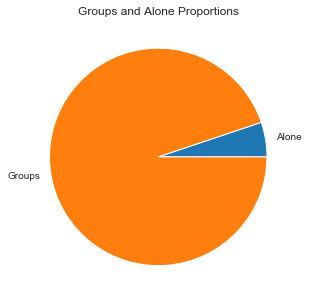

In [20]:
figure(figsize=(14,5))
alone = df_cleaned.num_of_adults[df_cleaned.num_of_adults == 1].sum()
groups = df_cleaned.num_of_adults[df_cleaned.num_of_adults >= 2].sum()

(pd.Series([alone, groups], index=['Alone', 'Groups'])/df_cleaned.shape[0]).plot(kind='pie');
plt.title('Groups and Alone Proportions');
plt.xticks(rotation=0);
plt.ylabel('');

Make a new column that indicates if client is travelling alone or in a group

In [90]:
df_cleaned['In_Groups'] = (df_cleaned.num_of_adults >= 2).replace({True: 1, False: 0})

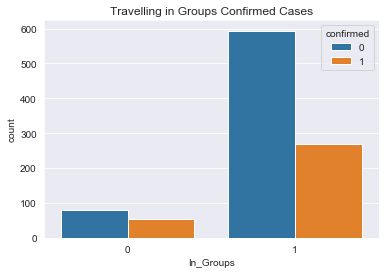

In [92]:
ax = sb.countplot(data=df_cleaned, x=df_cleaned.In_Groups, hue='confirmed');
plt.title('Travelling in Groups Confirmed Cases');

Impute missing values of price data with mean to make use of its information 

In [99]:
df_cleaned['price'].replace([np.nan], [df_cleaned.price.mean()], inplace=True)
df_cleaned['price'] = df_cleaned['price'].astype('int64')

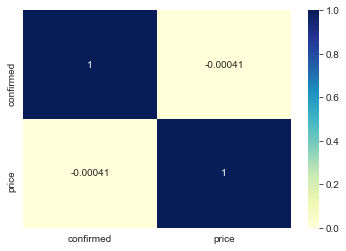

In [229]:
# Figuring out how data is correlated with each other and with the target label after imputing missing values
sb.heatmap(df_cleaned[['confirmed', 'price']].corr(), annot=True, cmap="YlGnBu");

##### Duration

Swap below incorrect arrival and duration date

In [163]:
df_cleaned[df['arrival_date'] > df['departure_date']]

,confirmed,nation,arrival_date,departure_date,num_of_adults,price,adwords,Duration
42,0,Italy,2012-12-29,2012-12-01,1,49,0,-28
262,0,Egypt,2016-03-20,2015-04-03,2,49,0,-352


In [195]:
df_cleaned['Duration'] = np.abs(df_cleaned['Duration'])

In [236]:
# df.loc[row_index,col_indexer] = value
arrival = df_cleaned.loc[42,'arrival_date']
departure = df_cleaned.loc[42,'departure_date']

df_cleaned.loc[42,'arrival_date'] = departure
df_cleaned.loc[42,'departure_date'] = arrival

In [238]:
arrival = df_cleaned.loc[262,'arrival_date']
departure = df_cleaned.loc[262,'departure_date']

df_cleaned.loc[262,'arrival_date'] = departure
df_cleaned.loc[262,'departure_date'] = arrival

Check if swapped dates correctly`

In [240]:
df_cleaned.query('Duration==28 or Duration==352')

,confirmed,nation,arrival_date,departure_date,num_of_adults,price,adwords,Duration,Duration_Categories
42,0,Italy,2012-12-01,2012-12-29,1,49,0,28,at most 4 weeks
262,0,Egypt,2015-04-03,2016-03-20,2,49,0,352,more than a month


Let's check correlation between duration and confirmed requests

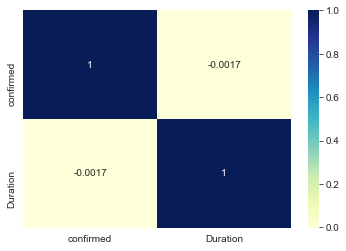

In [230]:
sb.heatmap(df_cleaned[['confirmed', 'Duration']].corr(), annot=True, cmap="YlGnBu");

In [211]:
df_cleaned['Duration_Categories'] = pd.cut(df_cleaned['Duration'], bins=[-1, 7, 14, 21, 30, 360] ,
                                           labels=['at most 1 week', 'at most 2 weeks',
                                                  'at most 3 weeks', 'at most 4 weeks','more than a month'])

In [212]:
df_cleaned[['Duration', 'Duration_Categories']]

,Duration,Duration_Categories
0,7,at most 1 week
1,7,at most 1 week
2,3,at most 1 week
3,0,at most 1 week
4,0,at most 1 week
...,...,...
995,0,at most 1 week
996,0,at most 1 week
997,4,at most 1 week
998,9,at most 2 weeks


Let's check clients like to request which travel duration the most 

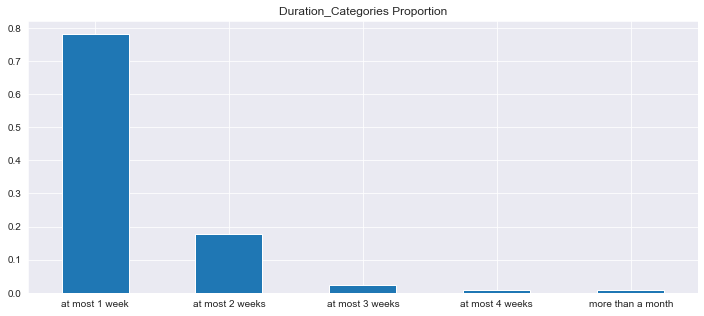

In [219]:
figure(figsize=(12,5))
duration_values = df_cleaned.Duration_Categories.value_counts()[:10]
(duration_values/df_cleaned.shape[0]).plot(kind='bar');
plt.title('Duration_Categories Proportion');
plt.xticks(rotation=0);

Let's check clients most confirmed travel durations

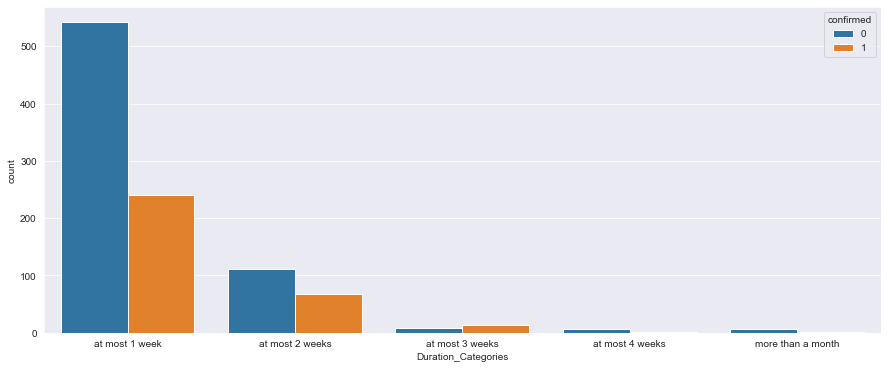

In [225]:
figure(figsize=(15,6))
ax = sb.countplot(data=df_cleaned, x=df_cleaned.Duration_Categories, hue='confirmed');
plt.xticks(rotation=0);

In [226]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   confirmed            1000 non-null   int64         
 1   nation               1000 non-null   object        
 2   arrival_date         1000 non-null   datetime64[ns]
 3   departure_date       1000 non-null   datetime64[ns]
 4   num_of_adults        1000 non-null   int64         
 5   price                1000 non-null   int64         
 6   adwords              1000 non-null   int64         
 7   Duration             1000 non-null   int64         
 8   Duration_Categories  1000 non-null   category      
dtypes: category(1), datetime64[ns](2), int64(5), object(1)
memory usage: 63.8+ KB


##### How well can we predict a clients confirmation